In [26]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg

In [27]:
df = pl.read_csv("../../DATA/mushrooms.csv")

In [28]:
df

class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""p""","""x""","""s""","""n""","""t""","""p""","""f""","""c""","""n""","""k""","""e""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""k""","""s""","""u"""
"""e""","""x""","""s""","""y""","""t""","""a""","""f""","""c""","""b""","""k""","""e""","""c""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""n""","""n""","""g"""
"""e""","""b""","""s""","""w""","""t""","""l""","""f""","""c""","""b""","""n""","""e""","""c""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""n""","""n""","""m"""
"""p""","""x""","""y""","""w""","""t""","""p""","""f""","""c""","""n""","""n""","""e""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""k""","""s""","""u"""
"""e""","""x""","""s""","""g""","""f""","""n""","""f""","""w""","""b""","""k""","""t""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""e""","""n""","""a""","""g"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""e""","""k""","""s""","""n""","""f""","""n""","""a""","""c""","""b""","""y""","""e""","""?""","""s""","""s""","""o""","""o""","""p""","""o""","""o""","""p""","""b""","""c""","""l"""
"""e""","""x""","""s""","""n""","""f""","""n""","""a""","""c""","""b""","""y""","""e""","""?""","""s""","""s""","""o""","""o""","""p""","""n""","""o""","""p""","""b""","""v""","""l"""
"""e""","""f""","""s""","""n""","""f""","""n""","""a""","""c""","""b""","""n""","""e""","""?""","""s""","""s""","""o""","""o""","""p""","""o""","""o""","""p""","""b""","""c""","""l"""


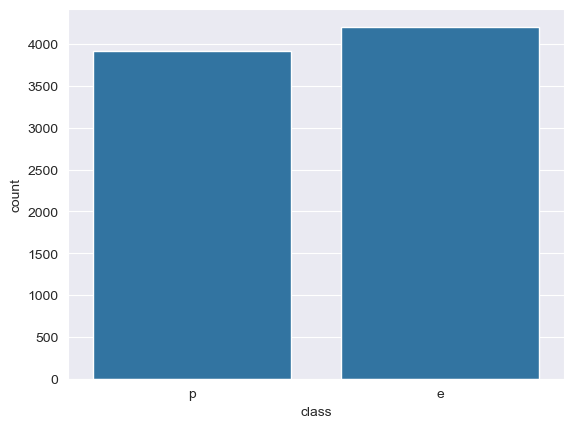

In [29]:
sns.countplot(data=df,x='class')
plt.show()

In [30]:
df.describe()

statistic,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124""","""8124"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""e""","""b""","""f""","""b""","""f""","""a""","""a""","""c""","""b""","""b""","""e""","""?""","""f""","""f""","""b""","""b""","""p""","""n""","""n""","""e""","""b""","""a""","""d"""
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""p""","""x""","""y""","""y""","""t""","""y""","""f""","""w""","""n""","""y""","""t""","""r""","""y""","""y""","""y""","""y""","""p""","""y""","""t""","""p""","""y""","""y""","""w"""


In [31]:
X = df.select(cs.exclude(['class'])).to_dummies()

In [32]:
y = df.get_column('class')

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

In [35]:
label_encoder.fit(y)

LabelEncoder()

In [36]:
y_encoded = label_encoder.transform(y)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=42)

In [39]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [40]:
ada_classifier = AdaBoostClassifier(
    n_estimators=1,
    random_state=42
)

In [41]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1, random_state=42)

In [42]:
predictions = ada_classifier.predict(X_test)

In [43]:
pl.DataFrame({
    'actual': y_test,
    'decoded_actual': label_encoder.inverse_transform(y_test),
    'predicted': predictions,
    'decoded_predicted': label_encoder.inverse_transform(predictions),
    'correct': predictions == y_test
})

actual,decoded_actual,predicted,decoded_predicted,correct
i64,str,i64,str,bool
0,"""e""",0,"""e""",true
1,"""p""",1,"""p""",true
1,"""p""",1,"""p""",true
0,"""e""",0,"""e""",true
1,"""p""",1,"""p""",true
…,…,…,…,…
1,"""p""",1,"""p""",true
1,"""p""",1,"""p""",true
0,"""e""",0,"""e""",true


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [45]:
predictions = ada_classifier.predict(X_test)

In [46]:
accuracy_score(y_test, predictions)

0.8835110746513536

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       637
           1       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [48]:
ada_classifier.score(X_test, y_test)

0.8835110746513536

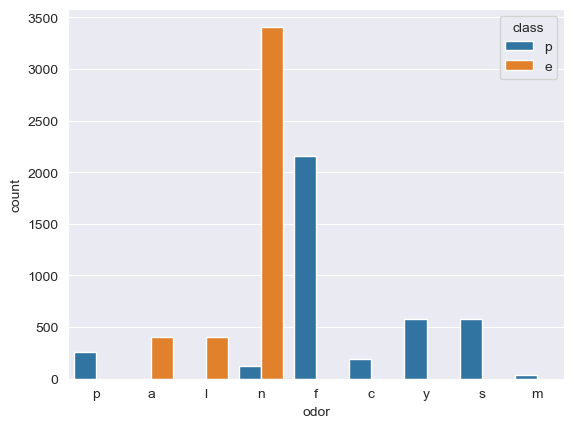

In [49]:
sns.countplot(data=df,x='odor',hue='class')
plt.show()

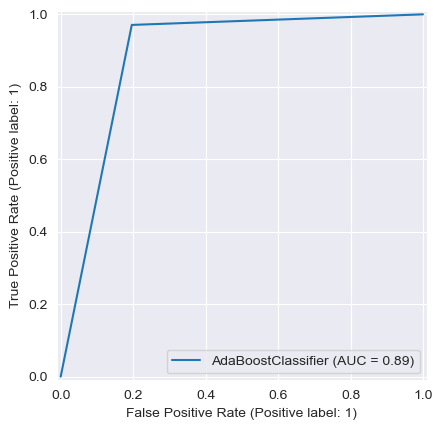

In [50]:
RocCurveDisplay.from_estimator(ada_classifier, X_test, y_test)
plt.show()